# PREDICTING STOCK PRICES
### Another "Beginner" Project
This is to demonstrate time series knowledge via prediction of stock prices from historical data. A big shout out to Nick Renotte and the data quest guy(will put his name as soon as I confirm it), yep found it, Vikas Paruchuri my man, you ROCK.  

So as usual my strategy remains the same:

1. Examine and Explore the data
2. Clean the data
3. Visualize the data
4. Feature Engineering
5. Modelling
6. Evaluation
7. Deployment(ish)

Note: In case you haven't noticed, I love spaces in between codes as jumbled codes give me creeps(kidding, I just get frustrated trying to read them.)

### Examine, Explore, Clean and Visualize the data.
The data is clean hence, not much work is needed.

In [12]:
# import our dependencies
import yfinance as yf

In [13]:
# get data to use(honestly, still a bit muddled about how it works, but we move.)

sp500 = yf.Ticker('^GSPC')

In [14]:
# get all(aka suck it dry)

sp500 = sp500.history('max')

In [15]:
# save to my local machine(irregular internet access)

sp500.to_csv('StockPriceData')

In [16]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#check our dataframe
#sp500 = pd.read_csv('StockPriceData', index_col='Date')
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


<AxesSubplot:title={'center':'Trend of Closing value.'}, xlabel='Date', ylabel='Close'>

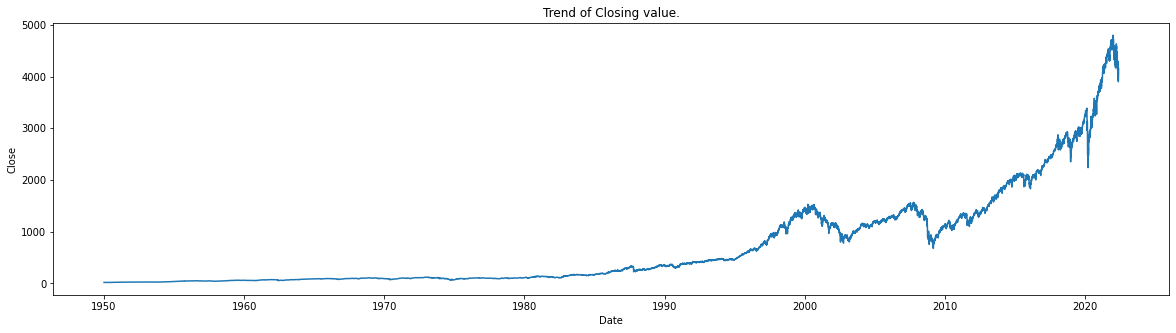

In [17]:
# plotting the Closing figure(value) over the years(decades?)
plt.figure(figsize=(20,5))

plt.title('Trend of Closing value.')

sns.lineplot(x='Date', y='Close', data=sp500)

In [18]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18220 entries, 1950-01-03 to 2022-05-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          18220 non-null  float64
 1   High          18220 non-null  float64
 2   Low           18220 non-null  float64
 3   Close         18220 non-null  float64
 4   Volume        18220 non-null  int64  
 5   Dividends     18220 non-null  int64  
 6   Stock Splits  18220 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


### Preliminary Observation(s)
it would seem that the data only started to "matter" in the grand scheme of things, as from early 90s(ish) upwards. I guess we better check that out.

<AxesSubplot:title={'center':'Trend of Closing value up till 1990.'}, xlabel='Date', ylabel='Close'>

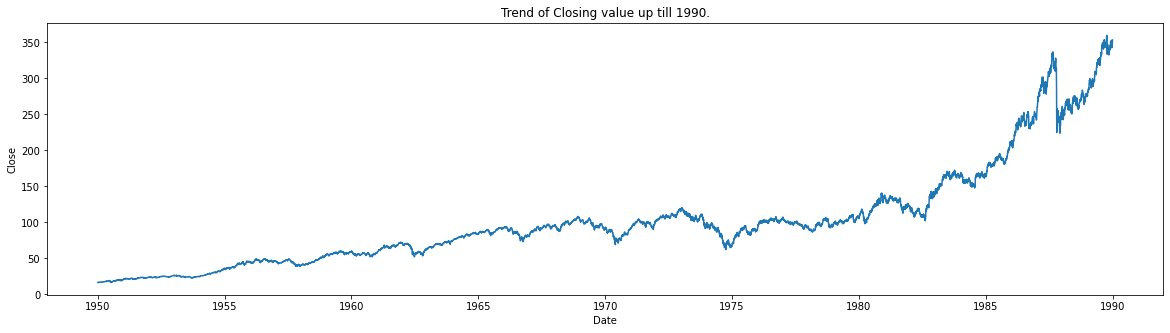

In [19]:
# Plotting for dates up to 1990-01-01

plt.figure(figsize=(20,5))
plt.title('Trend of Closing value up till 1990.')


sns.lineplot(x='Date', y='Close',data=sp500.loc[:'1990-01-01'])

Boy, was I wrong, apparently 1985, seems to have been the year of enlightenment, or is it?

<AxesSubplot:title={'center':'Trend of Closing value up till 1985.'}, xlabel='Date', ylabel='Close'>

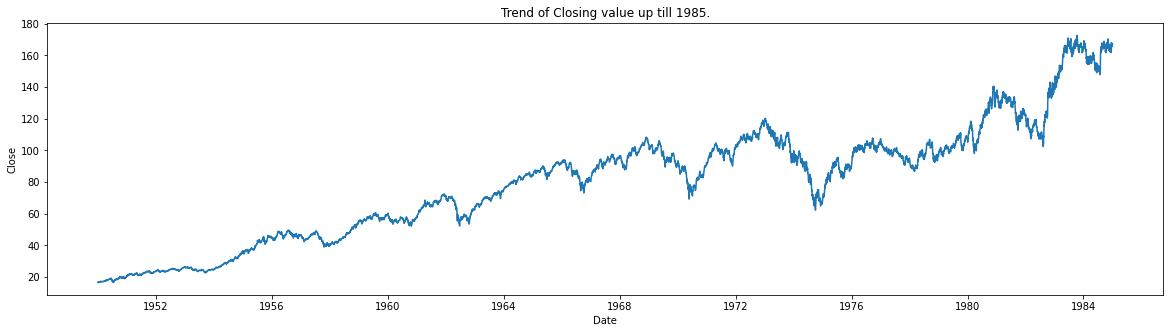

In [20]:
# Plotting for dates up to 1985-01-01

plt.figure(figsize=(20,5))

plt.title('Trend of Closing value up till 1985.')

sns.lineplot(x='Date', y='Close',data=sp500.loc[:'1985-01-01'])

### Preliminary Conclusion(I promise, no more after this)
As affirmed by many veterans(Daliana Liu et.al), you can torture any information you want out of data(tautology right?). A skilled data scientist is a fearful thing(@quaesita, accessed 2022).

### Next Step

For our sanity, we'll cut it off at 1985.

In [21]:
# slicing the dataset from 1985-01-01

sp500_new = sp500.loc['1985-01-01':]
sp500_new

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,67820000,0,0
1985-01-03,165.369995,166.110001,164.380005,164.570007,88880000,0,0
1985-01-04,164.550003,164.550003,163.360001,163.679993,77480000,0,0
1985-01-07,163.679993,164.710007,163.679993,164.240005,86190000,0,0
1985-01-08,164.240005,164.589996,163.910004,163.990005,92110000,0,0
...,...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,0,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,0,0
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,0,0


### Feature Engineering

In [22]:
# Remove 'Dividends' and 'Stock Splits'

del sp500_new['Dividends']
del sp500_new['Stock Splits']
sp500_new

,Open,High,Low,Close,Volume
Date,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,67820000
1985-01-03,165.369995,166.110001,164.380005,164.570007,88880000
1985-01-04,164.550003,164.550003,163.360001,163.679993,77480000
1985-01-07,163.679993,164.710007,163.679993,164.240005,86190000
1985-01-08,164.240005,164.589996,163.910004,163.990005,92110000
...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000


In [23]:
# getting future(ish) forecasts from whats known

sp500_new['Tomorrow'] = sp500_new['Close'].shift(-1)
sp500_new

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_6616/3952133536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_new['Tomorrow'] = sp500_new['Close'].shift(-1)


,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,67820000,164.570007
1985-01-03,165.369995,166.110001,164.380005,164.570007,88880000,163.679993
1985-01-04,164.550003,164.550003,163.360001,163.679993,77480000,164.240005
1985-01-07,163.679993,164.710007,163.679993,164.240005,86190000,163.990005
1985-01-08,164.240005,164.589996,163.910004,163.990005,92110000,165.179993
...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088


In [24]:
# set a target for the data set by comparing values

sp500_new['Target'] = (sp500_new['Tomorrow'] > sp500_new['Close']).astype(int)
sp500_new

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_6616/3788601020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_new['Target'] = (sp500_new['Tomorrow'] > sp500_new['Close']).astype(int)


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,67820000,164.570007,0
1985-01-03,165.369995,166.110001,164.380005,164.570007,88880000,163.679993,0
1985-01-04,164.550003,164.550003,163.360001,163.679993,77480000,164.240005,1
1985-01-07,163.679993,164.710007,163.679993,164.240005,86190000,163.990005,0
1985-01-08,164.240005,164.589996,163.910004,163.990005,92110000,165.179993,1
...,...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088,1


My usual M.O Correlation

<AxesSubplot:title={'center':'Heat map of correlation in the dataset.'}>

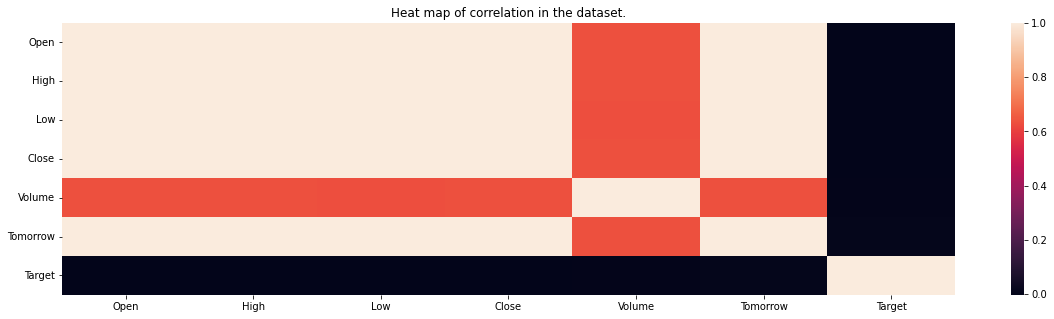

In [25]:
sp500_new.corr()

plt.figure(figsize=(20,5))
plt.title('Heat map of correlation in the dataset.')
sns.heatmap(data=sp500_new.corr())

Mmmhmn, it seems as if no one is friends with my target, however, Is multicolinearity a thing? Time will tell.

### Modelling

In [26]:
# setting up features and target

features = ['Open', 'High', 'Low','Close', 'Volume']

X_train = sp500_new[features].iloc[:-100]
y_train = sp500_new['Target'].iloc[:-100]

X_test = sp500_new[features].iloc[-100:]
y_test = sp500_new['Target'].iloc[-100:]

In [27]:
# import Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
# instantiate models

model_rf = RandomForestClassifier()
model_logit = LogisticRegression()

In [29]:
# Train the models.

model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [30]:
model_logit.fit(X_train, y_train)


LogisticRegression()

### Evaluation

In [31]:
# import the metrics libraries
from sklearn.metrics import classification_report

# Evaluate the models.

print('Random Forest:\n {}'.format(classification_report(model_rf.predict(X_test), y_test)))
#print('Logistic Regresssion: {}'.format(classification_report(model_logit.predict(X_test), y_test)))

Random Forest:
               precision    recall  f1-score   support

           0       0.38      0.51      0.44        41
           1       0.56      0.42      0.48        59

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.48      0.46      0.46       100



In [32]:
print('Logistic Regresssion:\n {}'.format(classification_report(model_logit.predict(X_test), y_test)))

Logistic Regresssion:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.45      0.62       100

    accuracy                           0.45       100
   macro avg       0.50      0.23      0.31       100
weighted avg       1.00      0.45      0.62       100



/data/user/0/ru.iiec.pydroid3/files/x86_64-linux-android/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/user/0/ru.iiec.pydroid3/files/x86_64-linux-android/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/user/0/ru.iiec.pydroid3/files/x86_64-linux-android/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

### Model Deployment
That's a joke right, not with this kind of score. Sorry Jenny Looper for not paying too much attention with the ARIMA as I think they would have done great here. I guess, it's time to dive back into learning sos as to improve on this travesty. see ya soonest.